In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scipy
from scipy.stats import linregress
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [72]:
#Study Data Files
happiness_data_path = "Resources/2018.csv"
alcohol_data_path = "Resources/Alcohol_Data.csv"
happiness_2015 = "Resources/2015.csv"

#Read Happiness and Alcohol Data
happiness_data_df = pd.read_csv(happiness_data_path)
alcohol_data_df = pd.read_csv(alcohol_data_path, skiprows = 4)
happiness_2015_df = pd.read_csv(happiness_2015)

In [73]:
#Preview Dataframe
happiness_data_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [74]:
#Grab Columns Needed from CSV
alcohol_data_df = alcohol_data_df[["Country Name", "Country Code", "2018"]]
#Renamed Column to Allow Merge on "Country or region"
alcohol_data_df_renamed = alcohol_data_df.rename(columns = {"Country Name": "Country or region"})
alcohol_data_df_renamed

,Country or region,Country Code,2018
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,5.170911
2,Afghanistan,AFG,0.210000
3,Africa Western and Central,AFW,6.835266
4,Angola,AGO,6.940000
...,...,...,...
261,Kosovo,XKX,NaN
262,"Yemen, Rep.",YEM,0.051000
263,South Africa,ZAF,9.520000
264,Zambia,ZMB,6.540000


In [75]:
#Grab Columns Needed From CSV
happiness_2015_df = happiness_2015_df[["Country", "Region"]]
#Renamed Column to Allow Merge on "Country or Region"
happiness_2015_df_renamed = happiness_2015_df.rename(columns = {"Country": "Country or region"})
happiness_2015_df_renamed

,Country or region,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


In [76]:
#Merge Alcohol Data and 2018 Data
happy_alcohol_df = pd.merge(alcohol_data_df_renamed, happiness_data_df, on=["Country or region"])
happy_alcohol_df

,Country or region,Country Code,2018,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,0.21,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Angola,AGO,6.94,142,3.795,0.730,1.125,0.269,0.000,0.079,0.061
2,Albania,ALB,7.17,112,4.586,0.916,0.817,0.790,0.419,0.149,0.032
3,United Arab Emirates,ARE,3.90,20,6.774,2.096,0.776,0.670,0.284,0.186,NaN
4,Argentina,ARG,9.65,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054
...,...,...,...,...,...,...,...,...,...,...,...
132,Vietnam,VNM,8.66,95,5.103,0.715,1.365,0.702,0.618,0.177,0.079
133,Kosovo,XKX,NaN,66,5.662,0.855,1.230,0.578,0.448,0.274,0.023
134,South Africa,ZAF,9.52,105,4.724,0.940,1.410,0.330,0.516,0.103,0.056
135,Zambia,ZMB,6.54,125,4.377,0.562,1.047,0.295,0.503,0.221,0.082


In [77]:
#Merge New DataFrame with Pulled 2015 Data
happy_alcohol_df_final = pd.merge(happy_alcohol_df, happiness_2015_df_renamed, on=["Country or region"])
happy_alcohol_df_final

,Country or region,Country Code,2018,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Afghanistan,AFG,0.21,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,Southern Asia
1,Angola,AGO,6.94,142,3.795,0.730,1.125,0.269,0.000,0.079,0.061,Sub-Saharan Africa
2,Albania,ALB,7.17,112,4.586,0.916,0.817,0.790,0.419,0.149,0.032,Central and Eastern Europe
3,United Arab Emirates,ARE,3.90,20,6.774,2.096,0.776,0.670,0.284,0.186,NaN,Middle East and Northern Africa
4,Argentina,ARG,9.65,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Vietnam,VNM,8.66,95,5.103,0.715,1.365,0.702,0.618,0.177,0.079,Southeastern Asia
129,Kosovo,XKX,NaN,66,5.662,0.855,1.230,0.578,0.448,0.274,0.023,Central and Eastern Europe
130,South Africa,ZAF,9.52,105,4.724,0.940,1.410,0.330,0.516,0.103,0.056,Sub-Saharan Africa
131,Zambia,ZMB,6.54,125,4.377,0.562,1.047,0.295,0.503,0.221,0.082,Sub-Saharan Africa


In [109]:
#Sort Final DataFrame, Reset Index, and Drop Rows with Any Null Values
happy_alcohol_df_sorted = happy_alcohol_df_final.sort_values(by=["Country or region"],ascending=True,ignore_index=True)
happy_alcohol_df_sorted_drop = happy_alcohol_df_sorted.dropna(how="any")
happy_alcohol_df_sorted_drop

,Country or region,Country Code,2018,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Afghanistan,AFG,0.21,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,Southern Asia
1,Albania,ALB,7.17,112,4.586,0.916,0.817,0.790,0.419,0.149,0.032,Central and Eastern Europe
2,Algeria,DZA,0.95,84,5.295,0.979,1.154,0.687,0.077,0.055,0.135,Middle East and Northern Africa
3,Angola,AGO,6.94,142,3.795,0.730,1.125,0.269,0.000,0.079,0.061,Sub-Saharan Africa
4,Argentina,ARG,9.65,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uruguay,URY,6.92,31,6.379,1.093,1.459,0.771,0.625,0.130,0.155,Latin America and Caribbean
129,Uzbekistan,UZB,2.59,44,6.096,0.719,1.584,0.605,0.724,0.328,0.259,Central and Eastern Europe
130,Vietnam,VNM,8.66,95,5.103,0.715,1.365,0.702,0.618,0.177,0.079,Southeastern Asia
131,Zambia,ZMB,6.54,125,4.377,0.562,1.047,0.295,0.503,0.221,0.082,Sub-Saharan Africa


The correlation between alcohol consumption and a country's happiness score is 0.38


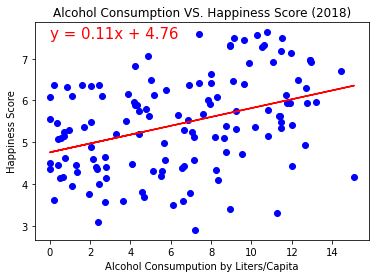

In [110]:
#Create a Plot That Compares and Calculates the Correlation Between a Country's Alcohol Consumption and Happiness Score
x = happy_alcohol_df_sorted_drop["2018"]
y = happy_alcohol_df_sorted_drop["Score"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("Alcohol Consumpution by Liters/Capita")
plt.ylabel("Happiness Score")
plt.title("Alcohol Consumption VS. Happiness Score (2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's happiness score is {round(correlation[0],2)}")

plt.savefig("AlcoholVSHappiness.png")

The correlation between alcohol consumption and a country's overall rank is -0.38


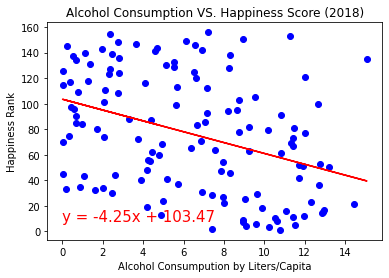

In [111]:
x = happy_alcohol_df_sorted_drop["2018"]
y = happy_alcohol_df_sorted_drop["Overall rank"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("Alcohol Consumpution by Liters/Capita")
plt.ylabel("Happiness Rank")
plt.title("Alcohol Consumption VS. Happiness Score (2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's overall rank is {round(correlation[0],2)}")

In [112]:
happiness_rank_df_sorted = happy_alcohol_df_final.sort_values(by=["Overall rank"],ascending=True,ignore_index=True)
happiness_rank_df_sorted

,Country or region,Country Code,2018,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Finland,FIN,10.78,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe
1,Norway,NOR,7.41,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe
2,Denmark,DNK,10.26,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe
3,Iceland,ISL,9.12,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe
4,Switzerland,CHE,11.53,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Liberia,LBR,6.12,149,3.495,0.076,0.858,0.267,0.419,0.206,0.030,Sub-Saharan Africa
129,Rwanda,RWA,8.95,151,3.408,0.332,0.896,0.400,0.636,0.200,0.444,Sub-Saharan Africa
130,Tanzania,TZA,11.27,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa
131,Central African Republic,CAF,2.38,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038,Sub-Saharan Africa


<AxesSubplot:xlabel='Country or region'>

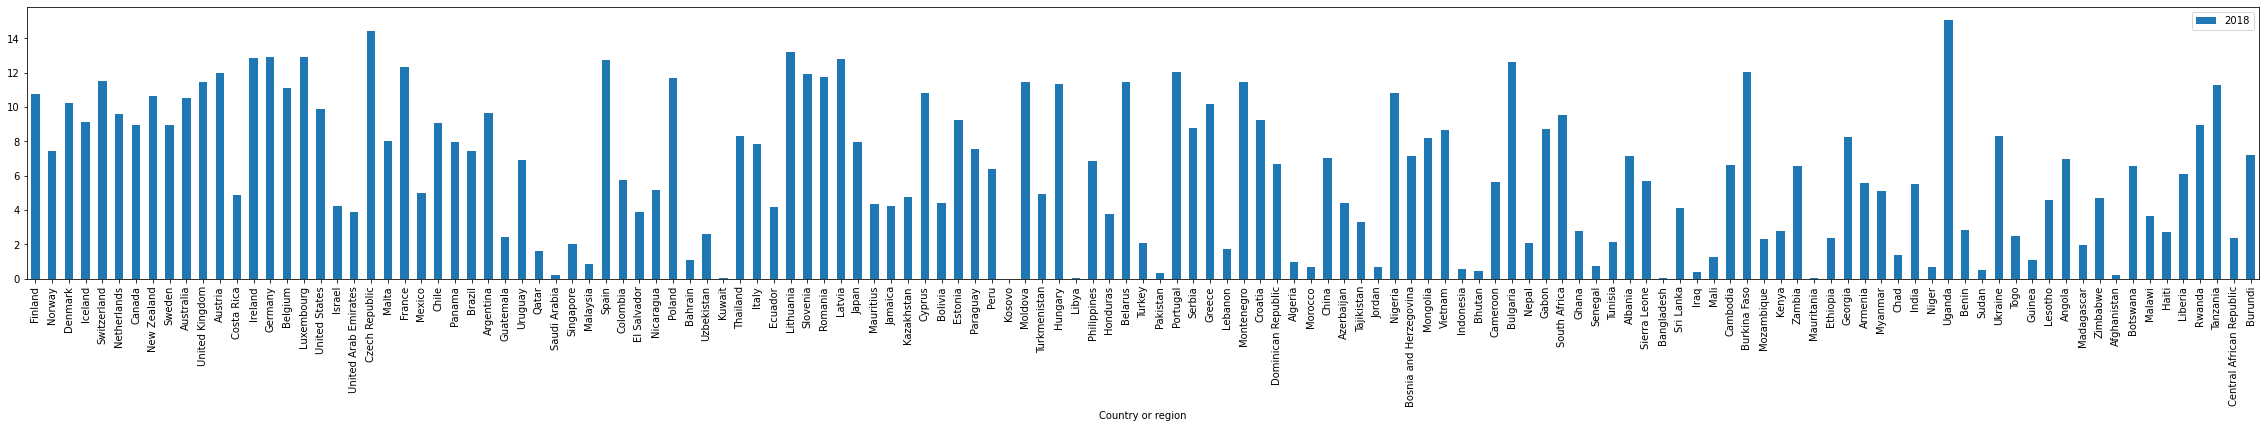

In [113]:
Bar = happiness_rank_df_sorted
Bar.plot('Country or region', '2018', figsize=(40,5), kind='bar')

In [114]:
#Groupby Region
happy_alcohol_df_final_group = happy_alcohol_df_sorted_drop.groupby("Region")
happy_groupby_means = happy_alcohol_df_final_group.mean()
#Sort By Overall Mean of a Region
happy_groupby_means_sorted = happy_groupby_means.sort_values(by=["Score"],ascending=True)
happy_groupby_means_sorted

,2018,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Region,,,,,,,,,
Sub-Saharan Africa,4.968364,128.060606,4.165273,0.447515,0.955848,0.269091,0.387485,0.176697,0.086576
Southern Asia,1.812714,111.714286,4.603857,0.625143,0.974429,0.497286,0.455714,0.243571,0.097857
Southeastern Asia,4.878750,78.375000,5.399750,0.915750,1.285000,0.625875,0.587375,0.321375,0.123750
Eastern Asia,7.733333,78.000000,5.428667,1.065667,1.373667,0.787333,0.515000,0.120333,0.095000
Central and Eastern Europe,9.073333,76.208333,5.437250,0.999417,1.314542,0.694833,0.392250,0.122750,0.069042
Middle East and Northern Africa,1.207846,67.923077,5.608615,1.133000,1.220154,0.683692,0.442077,0.150231,0.130231
Latin America and Caribbean,5.692105,48.578947,5.997316,0.884368,1.332368,0.666737,0.516842,0.142158,0.080737
Western Europe,10.738000,23.000000,6.829100,1.325650,1.489750,0.895800,0.559550,0.223850,0.214150
North America,9.405000,12.500000,7.107000,1.364000,1.501500,0.857500,0.600000,0.306000,0.212000


<AxesSubplot:xlabel='Region'>

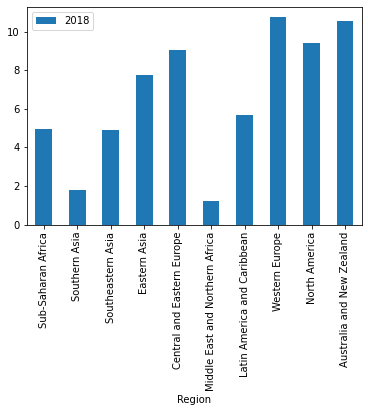

In [115]:
bar2 = happy_groupby_means_sorted
bar2["Region"] = happy_groupby_means_sorted.index
bar2.plot('Region', '2018', kind='bar')

In [116]:
#Calculate the Quartiles for Drinking

#Create empty list to fill with Drinking information (for plotting)
quartiles = []
means=[]
uppers = []
lowers=[]

q3, q1 = np.percentile(happy_alcohol_df_sorted_drop["2018"], [75 ,25])
iqr = q3 - q1
quartiles.append(iqr)
mean=happy_alcohol_df_sorted_drop["2018"].mean()
upper=q3+(iqr*1.5)
lower=q1-(iqr*1.5)

upper_outliers=happy_alcohol_df_sorted_drop.loc[happy_alcohol_df_sorted_drop["2018"] > upper]
lower_outliers=happy_alcohol_df_sorted_drop.loc[happy_alcohol_df_sorted_drop["2018"] < lower]

In [117]:
print(q3, q1, iqr)

9.629999999999999 2.525 7.104999999999999


The correlation between alcohol consumption and a country's happiness score is 0.42


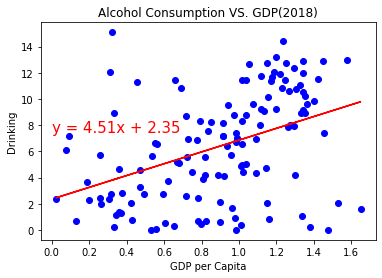

In [118]:
#Create a Plot That Compares and Calculates the Correlation Between a Country's Alcohol Consumption and GDP
y = happy_alcohol_df_sorted_drop["2018"]
x = happy_alcohol_df_sorted_drop["GDP per capita"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("GDP per Capita")
plt.ylabel("Drinking")
plt.title("Alcohol Consumption VS. GDP(2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's happiness score is {round(correlation[0],2)}")

plt.savefig("AlcoholVSGDP.png")

In [119]:
'''#Attempting to Calculate and Create a Polynomial Linear Regression
happy_alcohol_df_sorted_drop_renamed = happy_alcohol_df_sorted_drop.rename(columns= {"2018": "AverageDrinks",
                                                                          "GDP per capita": "GDP_per_capita"})
happy_alcohol_df_sorted_drop_renamed

#Grab Information We are Trying to Test
AverageDrinks = []
AverageDrink = happy_alcohol_df_sorted_drop_renamed["AverageDrinks"]

for item in AverageDrink:
    AverageDrinks.append(item)
    
print(AverageDrinks)

GDP = []
GDP_per_capita = happy_alcohol_df_sorted_drop_renamed["GDP_per_capita"]


for item in GDP_per_capita:
    GDP.append(item)
    
print(GDP)

x = GDP
y = AverageDrinks

#Split Data in Train and Test Set (test size = what percent of test data should be dataset (0.2=20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x_train)

#applying polynomial regression (using the degree as 2 since the OG equation calculated the intercept to be 2.23, it'll
#close enough for this test)
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)

#print(x_train_trans)

#x_test_trans = poly.transform(x_test)


#include bias parameter
#lr = LinearRegression()
#lr.fit(x_train, y_train)
#y_pred = lr.predict(x_test)
#print(r2_score(y_test, y_pred))'''

'#Attempting to Calculate and Create a Polynomial Linear Regression\nhappy_alcohol_df_sorted_drop_renamed = happy_alcohol_df_sorted_drop.rename(columns= {"2018": "AverageDrinks",\n                                                                          "GDP per capita": "GDP_per_capita"})\nhappy_alcohol_df_sorted_drop_renamed\n\n#Grab Information We are Trying to Test\nAverageDrinks = []\nAverageDrink = happy_alcohol_df_sorted_drop_renamed["AverageDrinks"]\n\nfor item in AverageDrink:\n    AverageDrinks.append(item)\n    \nprint(AverageDrinks)\n\nGDP = []\nGDP_per_capita = happy_alcohol_df_sorted_drop_renamed["GDP_per_capita"]\n\n\nfor item in GDP_per_capita:\n    GDP.append(item)\n    \nprint(GDP)\n\nx = GDP\ny = AverageDrinks\n\n#Split Data in Train and Test Set (test size = what percent of test data should be dataset (0.2=20%)\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)\n\nprint(x_train)\n\n#applying polynomial regression (using the deg

The correlation between alcohol consumption and a country's happiness score is 0.45


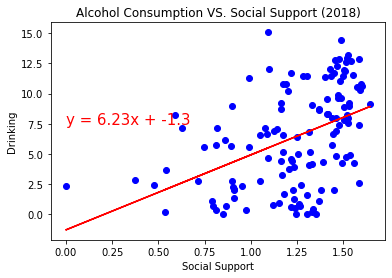

In [120]:
#Repeat with Social Support
y = happy_alcohol_df_sorted_drop["2018"]
x = happy_alcohol_df_sorted_drop["Social support"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("Social Support")
plt.ylabel("Drinking")
plt.title("Alcohol Consumption VS. Social Support (2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's happiness score is {round(correlation[0],2)}")

plt.savefig("AlcoholVSSocialSupport.png")

The correlation between alcohol consumption and a country's freedom to make life choices is 0.2


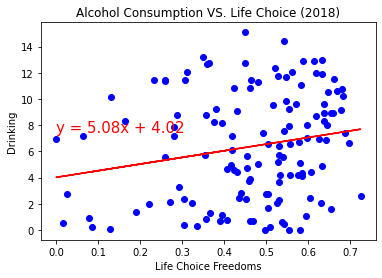

In [121]:
#Repeat with Freedom to Make Life Choices
y = happy_alcohol_df_sorted_drop["2018"]
x = happy_alcohol_df_sorted_drop["Freedom to make life choices"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("Life Choice Freedoms")
plt.ylabel("Drinking")
plt.title("Alcohol Consumption VS. Life Choice (2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's freedom to make life choices is {round(correlation[0],2)}")

plt.savefig("AlcoholVSFreedom.png")

The correlation between alcohol consumption and a country's generosity is -0.07


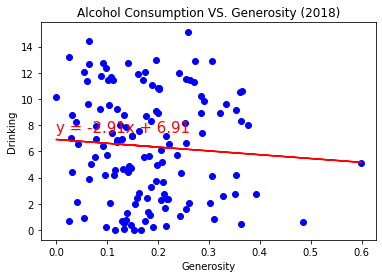

In [122]:
#Repeat with Generosity
y = happy_alcohol_df_sorted_drop["2018"]
x = happy_alcohol_df_sorted_drop["Generosity"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("Generosity")
plt.ylabel("Drinking")
plt.title("Alcohol Consumption VS. Generosity (2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's generosity is {round(correlation[0],2)}")

plt.savefig("AlcoholVSGenerosity.png")

The correlation between alcohol consumption and a country's assumed level of government corruption is 0.13


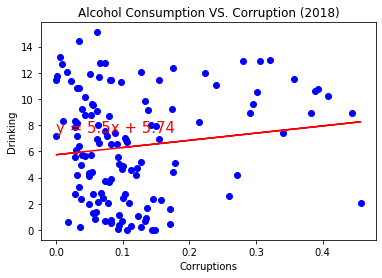

In [123]:
#Repeat with Government Corruption
y = happy_alcohol_df_sorted_drop["2018"]
x = happy_alcohol_df_sorted_drop["Perceptions of corruption"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("Corruptions")
plt.ylabel("Drinking")
plt.title("Alcohol Consumption VS. Corruption (2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's assumed level of government corruption is {round(correlation[0],2)}")

plt.savefig("AlcoholVSCorruption.png")

The correlation between alcohol consumption and a country's life expectancy is 0.43


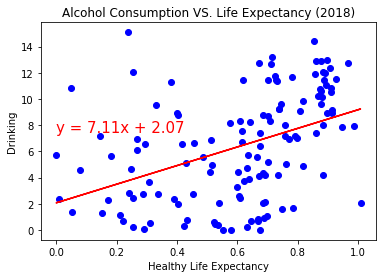

In [124]:
#Repeat with Life Expectancy
y = happy_alcohol_df_sorted_drop["2018"]
x = happy_alcohol_df_sorted_drop["Healthy life expectancy"]

plt.scatter(x, y, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Drinking")
plt.title("Alcohol Consumption VS. Life Expectancy (2018)")

correlation = scipy.pearsonr(x,y)
print(f"The correlation between alcohol consumption and a country's life expectancy is {round(correlation[0],2)}")

plt.savefig("AlcoholVSLifeExpectancy.png")